# Crime in SIlver Spring, MD and Temperature

The below script explores the relationship between the incidence of crime in Silver Spring, Maryland from 2017-2019 and the temperature of the weather. 
We used Pandas, Matplotlib, Linregress to accomplish our task.

[Logic behind our topic] We believe there might be a correlation between the temperature and the incidence of crime. During the winter when it's hardly feasible to be outside, it seems logical that there will be less incidence of crime compared to the summer, spring or fall.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime

## Data Retrieval

Crime Data: We retrieved the raw data of crime statistic in Maryland from dataMontgomery (https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3) in the csv format. 

Climate Data: ____________________________________ [URL HERE] 

Limitation with API: _______________

We ran into the problem of not being able to get the temperature data for data point after our 2nd project meeting, and decided to get the average temperature of each month. ---------EXPLAIN THE VALIDITY OF USING CLIMATE DATA---------------

Because of this limitation we also have to limit our analysis to one city as opposed to using every city with the available data in our csv file. We selected our data to be of a city with the highest number of crimes, so we have a good amount of data.

In [2]:
# Crime Data
# Save file path to variable
crimeMD_path = "Crime_MD.csv"

# Read with Pandas
crime_df = pd.read_csv(crimeMD_path, low_memory=False)
crime_df

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201223224,2303,190002520,01/16/2019 03:51:46 PM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,...,NaN,VEIRS MILL,NaN,RD,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D,"(39.0374, -77.0517)"
1,201224613,2006,190004310,01/27/2019 06:05:56 PM,200,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,...,NaN,GIRARD,NaN,ST,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D,"(39.1465, -77.1849)"
2,201267200,1103,190057412,11/28/2019 06:08:02 AM,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,...,NaN,GEORGIA,NaN,AVE,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D,"(39.0343, -77.0492)"
3,201230900,1399,190011960,03/15/2019 10:53:22 AM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,BLV,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D,"(39.1418, -77.2245)"
4,201265312,1399,190055150,11/15/2019 03:31:20 PM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,MIDCOUNTY,NaN,HWY,11/15/2019 03:20:00 PM,NaN,39.159339,-77.198516,6D,"(39.1593, -77.1985)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212991,201248696,4104,190034187,07/18/2019 06:48:53 PM,90G,1,Crime Against Society,Liquor Law Violations,LIQUOR - POSSESS,ROCKVILLE,...,NaN,MEADOW HALL,NaN,DR,07/18/2019 06:48:00 PM,NaN,39.075179,-77.112958,1D,"(39.0752, -77.113)"
212992,201250353,2902,190036349,07/30/2019 04:39:04 PM,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,ROCKVILLE,...,NaN,CRABBS BRANCH,NaN,WAY,07/11/2019 03:00:00 PM,07/11/2019 11:13:00 PM,39.119276,-77.156921,1D,"(39.1193, -77.1569)"
212993,201250255,2305,190035784,07/27/2019 01:20:11 PM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,NaN,BENTLEY,NaN,LA,07/19/2019 09:30:00 AM,07/27/2019 11:30:00 AM,39.030905,-77.057040,4D,"(39.0309, -77.057)"
212994,201243750,2203,190028212,06/13/2019 10:33:01 AM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-NONRESIDENTIAL,SILVER SPRING,...,NaN,SLIGO,NaN,AVE,06/13/2019 10:33:00 AM,06/13/2019 11:30:00 AM,38.990216,-77.024017,3D,"(38.9902, -77.024)"


In [3]:
# Climate Data
# Save file path to variable
climateMD_path = "silver_spring_climate.csv"

# Read with Pandas
climate_df = pd.read_csv(climateMD_path, low_memory=False)
climate_df

,Month,Temp
0,January,43
1,February,46
2,March,55
3,April,66
4,May,76
5,June,84
6,July,88
7,August,87
8,September,80
9,October,68


In [4]:
# Formatting the month for climate data for merge later
climate_df.columns = ['MonthName','Temp']
df = pd.to_datetime(climate_df['MonthName'], format='%B').dt.month
climate_df['Month'] = df
climate_df

,MonthName,Temp,Month
0,January,43,1
1,February,46,2
2,March,55,3
3,April,66,4
4,May,76,5
5,June,84,6
6,July,88,7
7,August,87,8
8,September,80,9
9,October,68,10


In [5]:
# Pulling out only the columns of interest
main_crime_df = crime_df[['Crime Name1', 'Crime Name2', 'Crime Name3', 'City', 'Start_Date_Time']]
main_crime_df

,Crime Name1,Crime Name2,Crime Name3,City,Start_Date_Time
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,01/16/2019 03:51:00 PM
1,Crime Against Property,Arson,ARSON - RESIDENTIAL,GAITHERSBURG,01/27/2019 06:05:00 PM
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,11/28/2019 06:08:00 AM
3,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,GAITHERSBURG,03/15/2019 10:50:00 AM
4,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,11/15/2019 03:20:00 PM
...,...,...,...,...,...
212991,Crime Against Society,Liquor Law Violations,LIQUOR - POSSESS,ROCKVILLE,07/18/2019 06:48:00 PM
212992,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,DERWOOD,07/11/2019 03:00:00 PM
212993,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,KENSINGTON,07/19/2019 09:30:00 AM
212994,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-NONRESIDENTIAL,SILVER SPRING,06/13/2019 10:33:00 AM


In [6]:
# Remove data with entry not considered as 'crime' and changing columns name 
main_crime_df = main_crime_df.loc[main_crime_df['Crime Name1'] != 'Not a Crime']
clean_crime_df = main_crime_df.rename(columns={'Crime Name1': 'Crime Main Category',
                                             'Crime Name2': 'Crime Sub Category',
                                             'Start_Date_Time': 'Date & Time of Crime'})

# Changed the string format of the Date & Time to be in the date/time format
clean_crime_df['Date & Time of Crime']= pd.to_datetime(clean_crime_df['Date & Time of Crime'])

In [7]:
# City Selection: Explore what city has the highest number of crime - Silver Spring!
clean_crime_df['City'].value_counts()

SILVER SPRING         74168
GAITHERSBURG          30079
ROCKVILLE             29479
GERMANTOWN            20511
BETHESDA              14148
MONTGOMERY VILLAGE     6510
TAKOMA PARK            5514
POTOMAC                4190
CHEVY CHASE            4188
DERWOOD                3712
KENSINGTON             3401
OLNEY                  3229
BURTONSVILLE           2596
CLARKSBURG             2101
DAMASCUS               1665
BOYDS                  1410
BROOKEVILLE             601
POOLESVILLE             599
ASHTON                  283
SANDY SPRING            256
DICKERSON               210
CABIN JOHN              155
SPENCERVILLE            100
GLEN ECHO                57
MOUNT AIRY               55
BRINKLOW                 55
BARNESVILLE              35
LAUREL                   33
BEALLSVILLE              30
WASHINGTON               12
BELTSVILLE                8
HYATTSVILLE               6
WOODBINE                  6
LANHAM                    5
ADELPHI                   4
ROCKVILLLE          

In [8]:
# Create a crime dataframe for Silver Spring
silverspring_crime_df = clean_crime_df.loc[clean_crime_df['City'] == 'SILVER SPRING']
silverspring_crime_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00
11,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00
...,...,...,...,...,...
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00
212990,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,2019-07-10 13:10:00


In [9]:
# Figure out the timeline of our raw data
data_first_date = silverspring_crime_df['Date & Time of Crime'].min()
data_last_date = silverspring_crime_df['Date & Time of Crime'].max()

print(data_first_date)
print(data_last_date)

# Throw away 2016 and 2020 in order to have a data of a full year
silverspring_clean_df = silverspring_crime_df.loc[(silverspring_crime_df['Date & Time of Crime'] > '2016-12-31 23:59:59') & (silverspring_crime_df['Date & Time of Crime'] < '2020-01-01 00:00:00')]
silverspring_clean_df

2016-07-01 00:00:00
2020-07-17 17:00:00


,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00
11,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00
...,...,...,...,...,...
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00
212990,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,2019-07-10 13:10:00


In [10]:
# Extract just the year and month from the Data/Time column
silverspring_clean_df['Year'] = pd.DatetimeIndex(silverspring_clean_df['Date & Time of Crime']).year
silverspring_clean_df['Month'] = pd.DatetimeIndex(silverspring_clean_df['Date & Time of Crime']).month

silverspring_clean_df.head(3)

C:\Users\ckuna\Anaconda3\envs\NewPythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ckuna\Anaconda3\envs\NewPythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00,2019,1
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00,2019,11
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00,2017,7


In [11]:
# Explore the types of crimes
silverspring_clean_df['Crime Main Category'].value_counts()

Crime Against Property    22440
Crime Against Society     19887
Other                      9395
Crime Against Person       4997
Name: Crime Main Category, dtype: int64

## Crime Against Property/Other

In [12]:
# Dan's code starts here - Property/Other

In [13]:
# Separate Crime Against Property from other crimes
sspring_property = silverspring_clean_df.loc[(silverspring_clean_df['Crime Main Category'] == 'Crime Against Property')]
sspring_property

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00,2019,1
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00,2017,7
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00,2019,9
21,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2018-12-04 17:30:00,2018,12
47,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,SILVER SPRING,2019-10-10 10:20:00,2019,10
...,...,...,...,...,...,...,...
212975,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2019-06-09 20:15:00,2019,6
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00,2019,7
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00,2019,6
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00,2019,6


In [14]:
# Separate Property Crimes by Year
propcrime_2017 = sspring_property.loc[(sspring_property['Year'] == 2017)]
propcrime_2018 = sspring_property.loc[(sspring_property['Year'] == 2018)]
propcrime_2019 = sspring_property.loc[(sspring_property['Year'] == 2019)]
propcrime_2017

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00,2017,7
108,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD - SWINDLE,SILVER SPRING,2017-12-21 00:00:00,2017,12
135,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2017-07-30 01:00:00,2017,7
292,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2017-07-08 14:00:00,2017,7
3200,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,SILVER SPRING,2017-05-25 12:00:00,2017,5
...,...,...,...,...,...,...,...
198569,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD - CONFIDENCE GAME,SILVER SPRING,2017-03-04 10:06:00,2017,3
199913,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),SILVER SPRING,2017-10-11 00:00:00,2017,10
201645,Crime Against Property,Identity Theft,IDENTITY THEFT,SILVER SPRING,2017-12-25 08:37:00,2017,12
203879,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,SILVER SPRING,2017-12-01 12:16:00,2017,12


In [15]:
pc2017_data = propcrime_2017['Month'].value_counts()
pc2017_data = pd.DataFrame(pc2017_data)
pc2017_data = pc2017_data.sort_index()

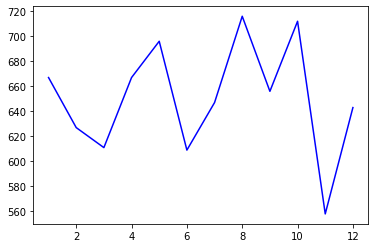

In [16]:
pc2017graph, = plt.plot(pc2017_data, color="blue", label="2017 Property Crime Data" )

In [17]:
pc2018_data = propcrime_2018['Month'].value_counts()
pc2018_data = pd.DataFrame(pc2018_data)
pc2018_data = pc2018_data.sort_index()

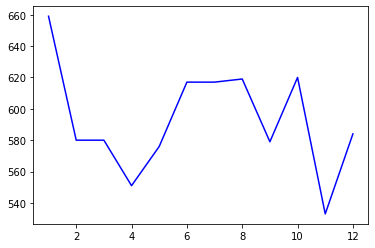

In [18]:
pc2018graph, = plt.plot(pc2018_data, color="blue", label="2018 Property Crime Data" )

In [19]:
pc2019_data = propcrime_2019['Month'].value_counts()
pc2019_data = pd.DataFrame(pc2019_data)
pc2019_data = pc2019_data.sort_index()

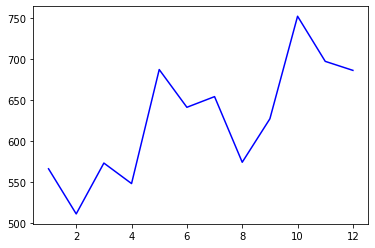

In [20]:
pc2019graph, = plt.plot(pc2019_data, color="blue", label="2019 Property Crime Data" )

In [21]:
md_temps = climate_df['Temp']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [22]:
pc2019_compiled_data = pc2019_data.rename(columns={"Month": "2019 Property Crime Count"})
pc2018_compiled_data = pc2018_data.rename(columns={"Month": "2018 Property Crime Count"})
pc2017_compiled_data = pc2017_data.rename(columns={"Month": "2017 Property Crime Count"})

pc2019_compiled_data.reset_index(drop=True, inplace=True)
pc2018_compiled_data.reset_index(drop=True, inplace=True)
pc2017_compiled_data.reset_index(drop=True, inplace=True)

pc2019_compiled_data['Temp'] = md_temps
pc2018_compiled_data['Temp'] = md_temps
pc2017_compiled_data['Temp'] = md_temps

pc2019_compiled_data['Month'] = months
pc2018_compiled_data['Month'] = months
pc2017_compiled_data['Month'] = months

pc2019_compiled_data['Year'] = 2019
pc2018_compiled_data['Year'] = 2018
pc2017_compiled_data['Year'] = 2017

pcMerged_data = pd.merge(pc2017_compiled_data, pc2018_compiled_data, on='Month', how='inner')
pcMerged_data = pd.merge(pcMerged_data, pc2019_compiled_data, on='Month', how='inner')

pcMerged_data.drop(columns = ['Temp_x', 'Temp_y'], inplace=True)
pcMerged_data


,2017 Property Crime Count,Month,Year_x,2018 Property Crime Count,Year_y,2019 Property Crime Count,Temp,Year
0,667,January,2017,659,2018,566,43,2019
1,627,February,2017,580,2018,511,46,2019
2,611,March,2017,580,2018,573,55,2019
3,667,April,2017,551,2018,548,66,2019
4,696,May,2017,576,2018,687,76,2019
5,609,June,2017,617,2018,641,84,2019
6,647,July,2017,617,2018,654,88,2019
7,716,August,2017,619,2018,574,87,2019
8,656,September,2017,579,2018,627,80,2019
9,712,October,2017,620,2018,752,68,2019


In [23]:
# Create a New Dataframe for number of crimes in each month, indexed by year & month
propMonthYeargroup = sspring_property.groupby(['Year','Month'])
prop_crime_count_mmyy = propMonthYeargroup['Month'].count()
prop_crime_count_mmyy_data = pd.DataFrame({'Number of Crime Incidence':prop_crime_count_mmyy})

# Reset the index to allow further data anaylysis
prop_crime_count_mmyy_data = prop_crime_count_mmyy_data.reset_index(drop=False)
prop_crime_count_mmyy_data

,Year,Month,Number of Crime Incidence
0,2017,1,667
1,2017,2,627
2,2017,3,611
3,2017,4,667
4,2017,5,696
5,2017,6,609
6,2017,7,647
7,2017,8,716
8,2017,9,656
9,2017,10,712


In [24]:
avgcrimepropgroup = prop_crime_count_mmyy_data.groupby('Month')
avgcrime_prop = avgcrimepropgroup['Number of Crime Incidence'].mean()

propcrime_avg_ct_df = pd.DataFrame({'Average Number of Crimes (Property)':avgcrime_prop})
propcrime_avg_ct_df = propcrime_avg_ct_df.reset_index(drop=False)
propcrime_avg_ct_df.drop(columns= 'Month')
propcrime_avg_ct_df['Month'] = months
propcrime_avg_ct_df['Temp'] = climate_df['Temp']
propcrime_avg_ct_df

,Month,Average Number of Crimes (Property),Temp
0,January,630.666667,43
1,February,572.666667,46
2,March,588.000000,55
3,April,588.666667,66
4,May,653.000000,76
5,June,622.333333,84
6,July,639.333333,88
7,August,636.333333,87
8,September,620.666667,80
9,October,694.666667,68


The r value is: 0.3550412952208746
The r-squared is: 0.12605432131211622


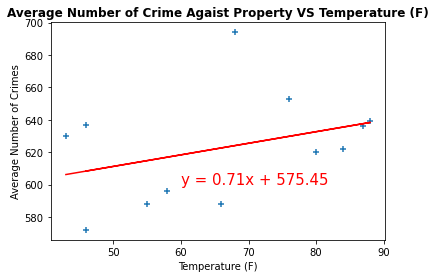

In [25]:
# Perform regression to look at average of crime and temperature
x_avgprop = propcrime_avg_ct_df['Temp']
y_avgprop = propcrime_avg_ct_df['Average Number of Crimes (Property)'].astype(int)

plt.scatter(x_avgprop, y_avgprop, marker='+')

# Labels
plt.xlabel('Temperature (F)')
plt.ylabel('Average Number of Crimes')
plt.title('Average Number of Crime Agaist Property VS Temperature (F)', fontsize=12, fontweight='bold')
# plt.legend(loc="best")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_avgprop, y_avgprop)
regress_values = x_avgprop * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_avgprop,regress_values,"r-")
plt.annotate(line_eq,(60,600),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [26]:
# Dan's code ends here

## Crime Against Person

In [27]:
# Cynthia's code starts here - Person

Sub-Hypothesis: We believe that as temperature decreases to a certain point during the winter, the crime against person will likely decreases. This is because people are less likely to come out during the winter time when it gets too cold, making crime occur less.


In [28]:
# Create Crime Against Person df
person_crime_df = silverspring_clean_df.loc[(silverspring_clean_df['Crime Main Category'] == 'Crime Against Person'), :]
person_crime_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00,2019,11
50,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,SILVER SPRING,2019-10-08 21:08:00,2019,10
131,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2018-10-01 00:00:00,2018,10
241,Crime Against Person,Fondling,SEX ASSAULT - FONDLING,SILVER SPRING,2019-08-18 12:00:00,2019,8
321,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,SILVER SPRING,2019-10-15 00:25:00,2019,10
...,...,...,...,...,...,...,...
212889,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-06-30 10:41:00,2019,6
212935,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - FAMILY-OTHER WEAPON,SILVER SPRING,2019-06-29 22:10:00,2019,6
212946,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-05-24 11:00:00,2019,5
212950,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-07-24 17:28:00,2019,7


In [29]:
# Explore the types of crimes against person
person_crime_df['Crime Sub Category'].value_counts()

Simple Assault                            3582
Aggravated Assault                         730
Forcible Rape                              217
Fondling                                   157
Forcible Fondling                           85
Forcible Sodomy                             73
Sexual Assault With An Object               51
Intimidation                                49
Murder and Nonnegligent Manslaughter        20
Kidnapping/Abduction                        14
All Other Offenses                          10
Human Trafficking, Commercial Sex Acts       7
Justifiable Homicide                         2
Name: Crime Sub Category, dtype: int64

In [30]:
# Using Groupby to get the # of crime incidence for each month
personmonthgroup = person_crime_df.groupby('Month')
personcrime_count_month = personmonthgroup['Month'].count()
personcrime_count_month

# Turn count of crime into a dataframe
personcrime_df = pd.DataFrame({'Number of Crime Incidence':personcrime_count_month})

# Drop the index to get month column, add month name 
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
personcrime_index_df = personcrime_df.reset_index(drop=True)
personcrime_index_df['Month'] = months
personcrime_index_df = personcrime_index_df[['Month','Number of Crime Incidence']]
personcrime_index_df

,Month,Number of Crime Incidence
0,January,384
1,February,362
2,March,434
3,April,404
4,May,439
5,June,442
6,July,405
7,August,404
8,September,471
9,October,416


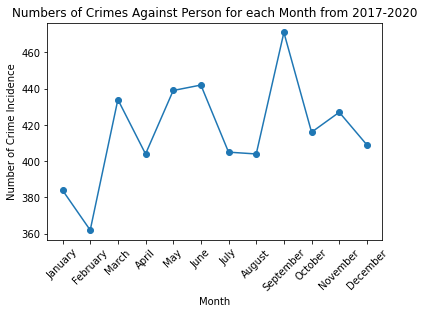

In [31]:
# Visualize the incidence of Crime Against Person for each month from 2017-2020
x_all = personcrime_index_df['Month']
y_all = personcrime_index_df['Number of Crime Incidence']

plt.plot(x_all, y_all, marker='o')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month from 2017-2020')

plt.show()

In [32]:
# Create different df for different year (2017-2019)

person_crime_2017df = person_crime_df.loc[person_crime_df['Year'] == 2017]
person_crime_2018df = person_crime_df.loc[person_crime_df['Year'] == 2018]
person_crime_2019df = person_crime_df.loc[person_crime_df['Year'] == 2019]

In [33]:
# Number of crime in each month for 2017

personmonth2017 = person_crime_2017df.groupby('Month')
personcrime_ct_2017 = personmonth2017['Month'].count()

# Turn count of crime into a dataframe
personcrime_ct_2017df = pd.DataFrame({'Number of Crime Incidence':personcrime_ct_2017})

# Drop the index to get month column, add month name 
personcrime_ct_2017df = personcrime_ct_2017df.reset_index(drop=True)
personcrime_ct_2017df['Month'] = months
personcrime_ct_2017df = personcrime_ct_2017df[['Month','Number of Crime Incidence']]
personcrime_ct_2017df

,Month,Number of Crime Incidence
0,January,145
1,February,109
2,March,142
3,April,133
4,May,125
5,June,135
6,July,136
7,August,132
8,September,159
9,October,149


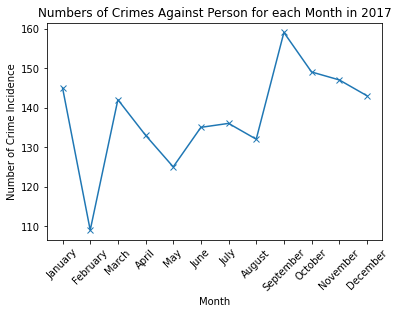

In [34]:
# Visualize the incidence of Crime Against Person for each month from 2017
x_2017 = personcrime_ct_2017df['Month']
y_2017 = personcrime_ct_2017df['Number of Crime Incidence']

handle17, = plt.plot(x_2017, y_2017, marker='x')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in 2017')

plt.show()

In [35]:
# Number of crime in each month for 2018

personmonth2018 = person_crime_2018df.groupby('Month')
personcrime_ct_2018 = personmonth2018['Month'].count()

# Turn count of crime into a dataframe
personcrime_ct_2018df = pd.DataFrame({'Number of Crime Incidence':personcrime_ct_2018})

# Drop the index to get month column, add month name 
personcrime_ct_2018df = personcrime_ct_2018df.reset_index(drop=True)
personcrime_ct_2018df['Month'] = months
personcrime_ct_2018df = personcrime_ct_2018df[['Month','Number of Crime Incidence']]
personcrime_ct_2018df

,Month,Number of Crime Incidence
0,January,129
1,February,129
2,March,156
3,April,131
4,May,168
5,June,158
6,July,129
7,August,148
8,September,165
9,October,135


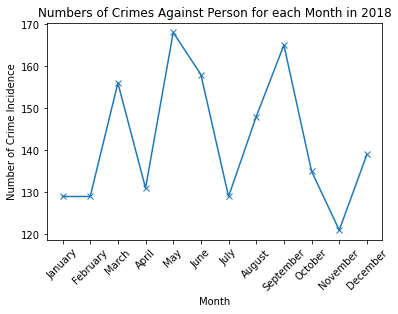

In [36]:
# Visualize the incidence of Crime Against Person for each month from 2018
x_2018 = personcrime_ct_2018df['Month']
y_2018 = personcrime_ct_2018df['Number of Crime Incidence']

handle18, = plt.plot(x_2018, y_2018, marker='x')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in 2018')

plt.show()

In [37]:
# Number of crime in each month for 2019

personmonth2019 = person_crime_2019df.groupby('Month')
personcrime_ct_2019 = personmonth2019['Month'].count()

# Turn count of crime into a dataframe
personcrime_ct_2019df = pd.DataFrame({'Number of Crime Incidence':personcrime_ct_2019})

# Drop the index to get month column, add month name 
personcrime_ct_2019df = personcrime_ct_2019df.reset_index(drop=True)
personcrime_ct_2019df['Month'] = months
personcrime_ct_2019df = personcrime_ct_2019df[['Month','Number of Crime Incidence']]
personcrime_ct_2019df

,Month,Number of Crime Incidence
0,January,110
1,February,124
2,March,136
3,April,140
4,May,146
5,June,149
6,July,140
7,August,124
8,September,147
9,October,132


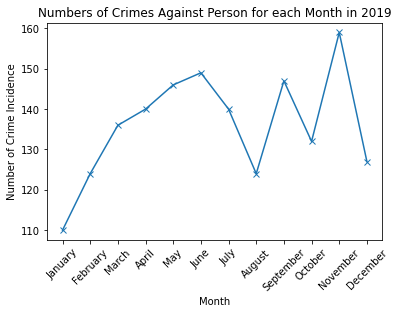

In [38]:
# Visualize the incidence of Crime Against Person for each month from 2019
x_2019 = personcrime_ct_2019df['Month']
y_2019 = personcrime_ct_2019df['Number of Crime Incidence']

handle19, = plt.plot(x_2019, y_2019, marker='x')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in 2019')

plt.show()

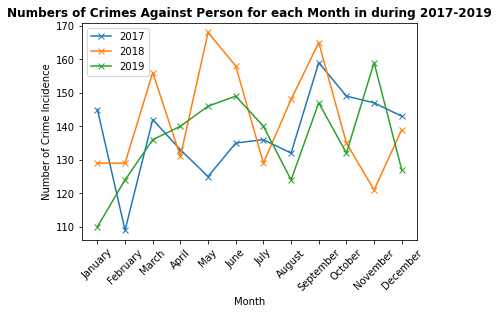

In [39]:
# Visualize the incidence of Crime Agasint person for all three years

# Graph from 2017
handle17, = plt.plot(x_2017, y_2017, marker='x', label='2017')
# Graph from 2018
handle18, = plt.plot(x_2018, y_2018, marker='x', label='2018')
# Graph from 2019
handle19, = plt.plot(x_2019, y_2019, marker='x', label='2019')

plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in during 2017-2019', fontsize=12, fontweight='bold')

plt.legend(loc="best")
plt.show()

Observation: There seems to be lower indcidence of crime agaist person in January-February. Then crime incidence starts to increase in March and drops again around July-August before spikes again in September, before drops again in November or December.

In [40]:
# Dataframe of Number of Crime incidence for all the years
personcrime_ct_split_df =  pd.DataFrame({'2017 Count':personcrime_ct_2017,
                                        '2018 Count': personcrime_ct_2018,
                                        '2019 Count': personcrime_ct_2019})
personcrime_ct_split_df

,2017 Count,2018 Count,2019 Count
Month,,,
1,145,129,110
2,109,129,124
3,142,156,136
4,133,131,140
5,125,168,146
6,135,158,149
7,136,129,140
8,132,148,124
9,159,165,147


In [41]:
# Adding climate and crime analysis
personcrime_climate_df = pd.merge(personcrime_ct_split_df, climate_df, how='left', on='Month')
# Removing Month number column
del personcrime_climate_df['Month']
# Rename and re-organize the columns in the dataframe
personcrime_climate_df = personcrime_climate_df.rename(columns={
    'MonthName': 'Month', 'Temp': 'Temperature (F)'
})
personcrime_climate_df = personcrime_climate_df[['Month','2017 Count', '2018 Count', '2019 Count', 'Temperature (F)']]
personcrime_climate_df

,Month,2017 Count,2018 Count,2019 Count,Temperature (F)
0,January,145,129,110,43
1,February,109,129,124,46
2,March,142,156,136,55
3,April,133,131,140,66
4,May,125,168,146,76
5,June,135,158,149,84
6,July,136,129,140,88
7,August,132,148,124,87
8,September,159,165,147,80
9,October,149,135,132,68


In [42]:
# Create a New Dataframe for number of crimes in each month, indexed by year & month
personmonthyeargroup = person_crime_df.groupby(['Year','Month'])
personcrime_count_mmyy = personmonthyeargroup['Month'].count()
personcrime_count_mmyy_df = pd.DataFrame({'Number of Crime Incidence':personcrime_count_mmyy})

# Reset the index to allow further data anaylysis
personcrime_count_mmyy_df = personcrime_count_mmyy_df.reset_index(drop=False)
personcrime_count_mmyy_df

,Year,Month,Number of Crime Incidence
0,2017,1,145
1,2017,2,109
2,2017,3,142
3,2017,4,133
4,2017,5,125
5,2017,6,135
6,2017,7,136
7,2017,8,132
8,2017,9,159
9,2017,10,149


In [43]:
# Taking the average of the amount of crime for each month from 2017-2019
avgcrimepersongroup = personcrime_count_mmyy_df.groupby('Month')
avgcrime_person = avgcrimepersongroup['Number of Crime Incidence'].mean()

personcrime_avg_ct_df = pd.DataFrame({'Average Number of Crime (Person)':avgcrime_person})
personcrime_avg_ct_df = personcrime_avg_ct_df.reset_index(drop=False)
personcrime_avg_ct_df

,Month,Average Number of Crime (Person)
0,1,128.000000
1,2,120.666667
2,3,144.666667
3,4,134.666667
4,5,146.333333
5,6,147.333333
6,7,135.000000
7,8,134.666667
8,9,157.000000
9,10,138.666667


In [44]:
# Merge the average of crime df with climate df
avgcrime_person_temp_df = pd.merge(personcrime_avg_ct_df, climate_df, how='inner', on='Month')
avgcrime_person_temp_df

,Month,Average Number of Crime (Person),MonthName,Temp
0,1,128.000000,January,43
1,2,120.666667,February,46
2,3,144.666667,March,55
3,4,134.666667,April,66
4,5,146.333333,May,76
5,6,147.333333,June,84
6,7,135.000000,July,88
7,8,134.666667,August,87
8,9,157.000000,September,80
9,10,138.666667,October,68


In [45]:
# Removing Month number column
del avgcrime_person_temp_df['Month']

In [46]:
# Rename and re-organize the columns in the dataframe
avgcrime_person_temp_df = avgcrime_person_temp_df.rename(columns={
    'MonthName': 'Month', 'Temp': 'Temperature (F)'
})
avgcrime_person_temp_df = avgcrime_person_temp_df[['Month','Average Number of Crime (Person)', 'Temperature (F)']]

avgcrime_person_temp_df

,Month,Average Number of Crime (Person),Temperature (F)
0,January,128.000000,43
1,February,120.666667,46
2,March,144.666667,55
3,April,134.666667,66
4,May,146.333333,76
5,June,147.333333,84
6,July,135.000000,88
7,August,134.666667,87
8,September,157.000000,80
9,October,138.666667,68


The r value is: 0.501305162690757
The r-squared is: 0.2513068661404063


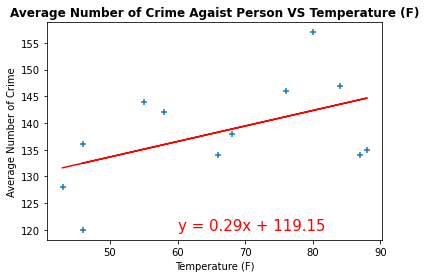

In [47]:
# Perform regression to look at average of crime and temperature
x_avgperson = avgcrime_person_temp_df['Temperature (F)']
y_avgperson = avgcrime_person_temp_df['Average Number of Crime (Person)'].astype(int)

plt.scatter(x_avgperson, y_avgperson, marker='+')

# Labels
plt.xlabel('Temperature (F)')
plt.ylabel('Average Number of Crime')
plt.title('Average Number of Crime Agaist Person VS Temperature (F)', fontsize=12, fontweight='bold')
# plt.legend(loc="best")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_avgperson, y_avgperson)
regress_values = x_avgperson * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_avgperson,regress_values,"r-")
plt.annotate(line_eq,(60,120),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [48]:
# Trying to make the most out of our data...

# Sort the df by temperature to get some insight
avgcrime_person_temp_df.sort_values('Temperature (F)', ascending=False)

# Create 4 bins to place average number of crime
bins = [40, 50, 67, 80, 90]

# Create labels for the bins
group_bins = ['Cold', 'Cool', 'Warm', 'Hot']

# Slice the data and place it into bins
bin_slice = pd.cut(avgcrime_person_temp_df['Temperature (F)'], bins, labels=group_bins)

# Create a new column where the data shows the bins they belong
avgcrime_person_temp_df['Temperature Category'] = bin_slice
avgcrime_person_temp_df

,Month,Average Number of Crime (Person),Temperature (F),Temperature Category
0,January,128.000000,43,Cold
1,February,120.666667,46,Cold
2,March,144.666667,55,Cool
3,April,134.666667,66,Cool
4,May,146.333333,76,Warm
5,June,147.333333,84,Hot
6,July,135.000000,88,Hot
7,August,134.666667,87,Hot
8,September,157.000000,80,Warm
9,October,138.666667,68,Warm


In [49]:
# Group the data according to the temperature category
temp_group = avgcrime_person_temp_df.groupby('Temperature Category')

# Get the average # of crime for each temperature
tempgroup_avg_df = temp_group[['Average Number of Crime (Person)']].mean()

# Formating the average number of crime to be whole number
tempgroup_avg_df.astype(int)

,Average Number of Crime (Person)
Temperature Category,
Cold,128
Cool,140
Warm,147
Hot,139


The incidence of crime against person seems to be lower when the 

In [50]:
# Cynthia's code ends here

## Crime Against Society

In [51]:
# Rose's code starts here - Society

In [52]:
# Rose's code ends here

In [53]:
# Paul's code starts here - API!!!

In [54]:
# Paul's code ends here